# installation and setup

In [2]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [7]:
df = df.drop(columns=['Employee ID'])

In [8]:
df = pd.get_dummies(df,columns=['Gender', 'Job Role', 'Work-Life Balance', 'Overtime','Education Level', 'Job Satisfaction', 'Marital Status', 'Performance Rating', 'Job Level',	'Company Size',	'Remote Work',	'Leadership Opportunities',	'Innovation Opportunities',	'Company Reputation',	'Employee Recognition'])

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [11]:
x = df.drop(columns=['Attrition'])
y = df['Attrition']

In [12]:
st = StandardScaler()
X = st.fit_transform(x)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

In [14]:
X_train.shape

(47678, 56)

In [119]:
y_train.shape

(47678,)

In [120]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=192, activation="relu", input_shape=(56,)))
model.add(tf.keras.layers.Dropout(0.7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=160, activation="relu"))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=32, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 192)                 │          10,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 192)                 │             768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 160)                 │          30,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 160)                 │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          20,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,137 (309.13 KB)

 Trainable params: 78,049 (304.88 KB)

 Non-trainable params: 1,088 (4.25 KB)

In [122]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [123]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5277 - loss: 0.7041 - val_accuracy: 0.6727 - val_loss: 0.5779
Epoch 2/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7054 - loss: 0.5742 - val_accuracy: 0.7218 - val_loss: 0.5220
Epoch 3/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7373 - loss: 0.5364 - val_accuracy: 0.7326 - val_loss: 0.5238
Epoch 4/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7350 - loss: 0.5331 - val_accuracy: 0.7347 - val_loss: 0.5099
Epoch 5/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7370 - loss: 0.5302 - val_accuracy: 0.7437 - val_loss: 0.5050
Epoch 6/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7426 - loss: 0.5225 - val_accuracy: 0.7404 - val_loss: 0.5060
Epoch 7/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7396 - loss: 0.5204 - val_accuracy: 0.7428 - val_loss: 0.5074
Epoch 8/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7407 - loss: 0.5209 

In [124]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7375 - loss: 0.5050


In [125]:
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Test accuracy: 74.15%


In [126]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [127]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

In [128]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)

  plt.plot(epoch_range, accuracy)
  plt.plot(epoch_range, val_accuracy)
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["train", "val"], loc="upper left")
  plt.show()

  plt.plot(epoch_range, loss)
  plt.plot(epoch_range, val_loss)
  plt.title("Model Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(["train", "val"], loc="upper left")
  plt.show()

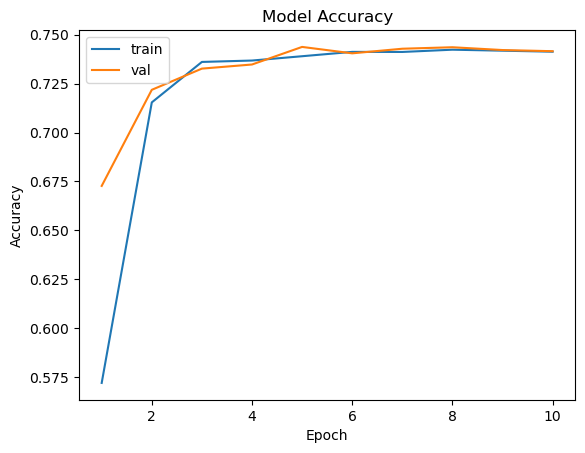

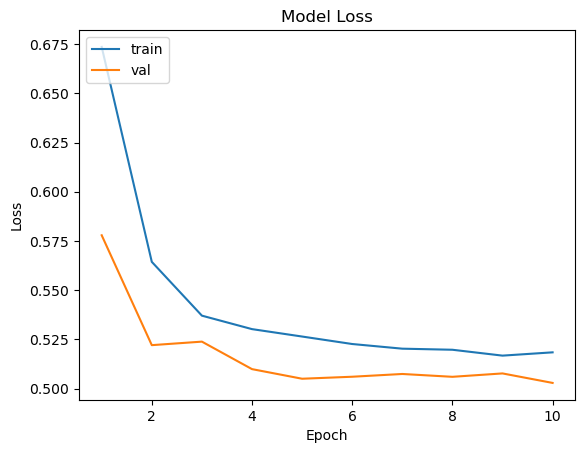

In [129]:
learning_curve(history, 10)